In [1]:
from config import api_key
import pandas as pd
import numpy as np
import requests 
import brewerydb as br
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
#%matplotlib notebook

In [3]:
beer_data = pd.read_csv('data/beers.csv')
brew_data = pd.read_csv('data/brewery_data.csv')
print(beer_data.head())
print(brew_data.head())

brew_data_s = brew_data[['Brewery ID','Brewery Name']]
brew_data_s['brewery_id'] = brew_data_s['Brewery ID']

   Unnamed: 0 beer_id                       name               display_name  \
0           0  c4f2KE           'Murican Pilsner           'Murican Pilsner   
1           1  zTTWa2                11.5° PLATO                11.5° PLATO   
2           2  zfP2fK              12th Of Never              12th Of Never   
3           3  xwYSL2       15th Anniversary Ale       15th Anniversary Ale   
4           4  UJGpVS  16 So Fine Red Wheat Wine  16 So Fine Red Wheat Wine   

    abv   ibu  style_id  year  glass_id organic brewery_id retired    status  \
0   5.5  32.5      98.0   NaN       4.0       N     nHLlnK       N  verified   
1   4.5  35.0     164.0   NaN       NaN       N     nHLlnK       N  verified   
2   5.5  45.0      25.0   NaN       NaN       N     nLsoQ9       N  verified   
3   NaN  37.5       5.0   NaN       NaN       N     TMc6H2       N  verified   
4  11.0  65.0      35.0   NaN       NaN       N     TMc6H2       N  verified   

   ingredients              hops      malt m

C:\Users\norfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [6]:
beerbrewed = pd.merge(beer_data,brew_data_s,how = 'left',on=['brewery_id'])

In [7]:
beerbrewed['short_name'] =beerbrewed['Brewery Name'].str.split(n=1,expand=True)[0]

In [8]:
bb =beerbrewed['short_name'].value_counts()
x_axis = np.arange(len(bb))
beerbrewed


,Unnamed: 0,beer_id,name,display_name,abv,ibu,style_id,year,glass_id,organic,...,retired,status,ingredients,hops,malt,misc,yeast,Brewery ID,Brewery Name,short_name
0,0,c4f2KE,'Murican Pilsner,'Murican Pilsner,5.50,32.5,98.0,NaN,4.0,N,...,N,verified,0,NaN,NaN,NaN,NaN,nHLlnK,Sierra Nevada Brewing Company,Sierra
1,1,zTTWa2,11.5° PLATO,11.5° PLATO,4.50,35.0,164.0,NaN,NaN,N,...,N,verified,0,NaN,NaN,NaN,NaN,nHLlnK,Sierra Nevada Brewing Company,Sierra
2,2,zfP2fK,12th Of Never,12th Of Never,5.50,45.0,25.0,NaN,NaN,N,...,N,verified,0,NaN,NaN,NaN,NaN,nLsoQ9,Lagunitas Brewing Company,Lagunitas
3,3,xwYSL2,15th Anniversary Ale,15th Anniversary Ale,NaN,37.5,5.0,NaN,NaN,N,...,N,verified,2,22;24;26;11;157;,247;650;,NaN,NaN,TMc6H2,SweetWater Brewing Company,SweetWater
4,4,UJGpVS,16 So Fine Red Wheat Wine,16 So Fine Red Wheat Wine,11.00,65.0,35.0,NaN,NaN,N,...,N,verified,1,4;11;86;157;,NaN,NaN,NaN,TMc6H2,SweetWater Brewing Company,SweetWater
5,5,vz5JZ1,1794 The Fergal Project,1794 The Fergal Project,4.50,47.5,42.0,NaN,NaN,N,...,N,verified,0,NaN,NaN,NaN,NaN,DifSi4,Wachusett Brewing Company,Wachusett
6,6,LcpeBb,17th Saison,17th Saison,9.00,30.0,72.0,NaN,NaN,N,...,N,verified,2,4;24;45;113;,NaN,NaN,1872;,TMc6H2,SweetWater Brewing Company,SweetWater
7,7,Yd8G8r,18th Anniversary Belgian Tripel,18th Anniversary Belgian Tripel,10.00,17.0,59.0,NaN,NaN,N,...,N,verified,2,4;24;130;,NaN,NaN,1845;,TMc6H2,SweetWater Brewing Company,SweetWater
8,8,iJ329Y,19 - Golden Belgian Style Ale,19 - Golden Belgian Style Ale,7.00,NaN,135.0,NaN,NaN,N,...,N,verified,0,NaN,NaN,NaN,NaN,TMc6H2,SweetWater Brewing Company,SweetWater
9,9,O78ldO,1904 American Red Lager,1904 American Red Lager,5.00,9.0,93.0,NaN,NaN,N,...,N,verified,0,NaN,NaN,NaN,NaN,BznahA,Anheuser-Busch InBev,Anheuser-Busch


([<matplotlib.axis.XTick at 0x2378e6fc198>,
 <a list of 17 Text xticklabel objects>)

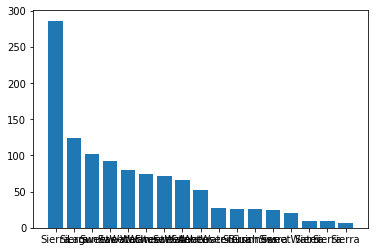

In [10]:
plt.bar(x_axis,bb)
xlabel = beerbrewed['short_name']
plt.xticks(np.arange(17),xlabel)

In [ ]:
bb[0:7].values

In [11]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread

def image_plot(heights, images, spacing=0):
    # Iterate through images and data, autoscaling the width to
    # the aspect ratio of the image
    for i, (height, img) in enumerate(zip(heights, images)):
        AR = img.shape[1] / img.shape[0]
        width = 200 #height * AR
        left = width*i + spacing*i
        right = left + width
        plt.imshow(img, extent=[left, right, 0, height])
    # Set x,y limits on plot window
    plt.xlim(0, right)
    plt.ylim(0, max(heights)*1.1)

In [12]:
sierraNevada = imread('Images/sierraNevada.jpg')
inbev = imread('Images/inbev.jpg').swapaxes(0, 1)
oskar = imread('Images/oskarBrew.jpg')
jack = imread('Images/jack.png')
lagun = imread('Images/lagun.png')
nH = imread('Images/newHolland.jpg')
sweet = imread('Images/sweetwater.jpg')

C:\Users\norfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
C:\Users\norfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
C:\Users\norfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\norfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after remov

In [13]:
images = [sierraNevada, oskar, nH, lagun, sweet, jack, inbev]


In [14]:
xt = np.arange(100, 1400,200)
xl = bb.index[0:7]

Text(0.5,1,'Most Prolific Breweries(?)')

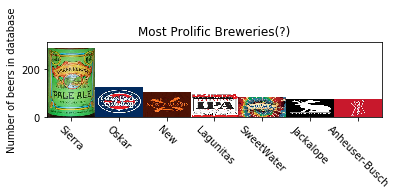

In [15]:
image_plot(bb[0:7].values,images)
plt.xticks(xt,xl,rotation=-45)
plt.ylabel('Number of beers in database')
plt.title('Most Prolific Breweries(?)')
#plt.xticks()

In [ ]:
beerbrewed.groupby('Brewery Name').count()

In [ ]:
brew_names = bb[0:7].index.str.split(n=1,expand=True)[0]
brew_names

In [15]:
help(plt.boxplot)

Help on function boxplot in module matplotlib.pyplot:

boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_xticks=True, autorange=False, zorder=None, hold=None, data=None)
    Make a box and whisker plot.
    
    Make a box and whisker plot for each column of ``x`` or each
    vector in sequence ``x``.  The box extends from the lower to
    upper quartile values of the data, with a line at the median.
    The whiskers extend from the box to show the range of the
    data.  Flier points are those past the end of the whiskers.
    
    Parameters
    ----------
    x : Array or a sequence of vectors.
        The input data.
    
    notch : bool, optional (False)
        If `True`, will pr

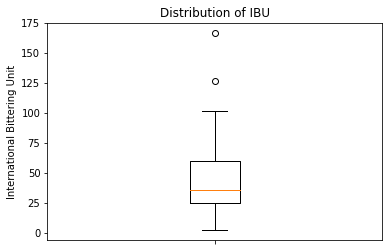

In [163]:
# Create box plot
plt.boxplot(beer_data[beer_data['ibu'].notna()]['ibu'])
plt.title('Distribution of IBU')
plt.ylabel('International Bittering Unit')
plt.xticks([1],[''])
plt.savefig('Images/dist_ibu.png')

In [125]:
bins = [0, np.percentile(beer_data[beer_data['ibu'].notna()]['ibu'],25), np.percentile(beer_data[beer_data['ibu'].notna()]['ibu'],50),
            np.percentile(beer_data[beer_data['ibu'].notna()]['ibu'],75),101]

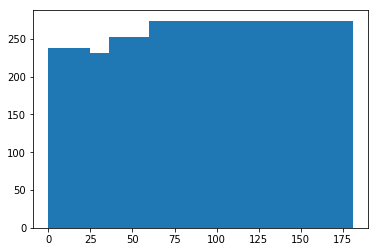

In [121]:
den = plt.hist(beer_data[beer_data['ibu'].notna()]['ibu'],bins=bins)


In [47]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, hold=None, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequence of


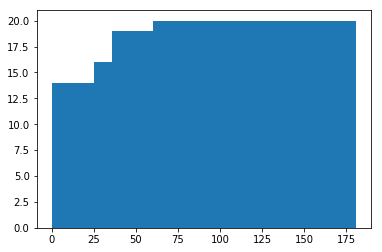

In [122]:
num = plt.hist(beer_data[beer_data['hops'].notna()& beer_data['ibu'].notna()]['ibu'],bins=bins)

In [126]:
frac_hop = num[0]/den[0]
frac_hop

center = [(bins[i] + bins[i+1])/2 for i in np.arange(len(bins)-1)]
center

[12.5, 30.5, 48.0, 80.5]

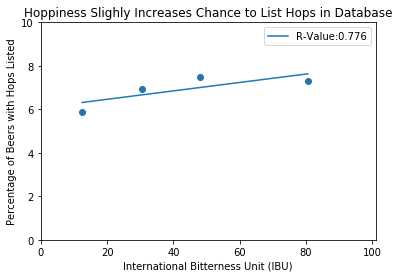

In [164]:
sun = plt.subplot()
hop_plot = plt.scatter(center,frac_hop*100)
plt.xlim(0,101)
plt.ylim(0,10)
plt.xlabel('International Bitterness Unit (IBU)')
plt.ylabel('Percentage of Beers with Hops Listed')
plt.title('Hoppiness Slighly Increases Chance to List Hops in Database')
lin = linregress(center,frac_hop)
plt.plot(center,[100*(lin[0]*el +lin[1]) for el in center],label='R-Value:' + str(round(lin[2],3)))
plt.legend()
plt.savefig('Images/ibu_regress.png')

In [158]:
lin

LinregressResult(slope=0.00019356025116826236, intercept=0.060745882639913255, rvalue=0.7757114636096988, pvalue=0.22428853639030122, stderr=0.00011135012457584894)